
### Thera Bank Personal Loan Campaign
#### Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.
Domain: Banking
#### Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.
Attribute Information:
* ID: Customer ID
* Age: Customer's age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (000)
* ZIP Code: Home Address ZIP code.
* Family: Family size of the customer
* CCAvg: Avg. spending on credit cards per month (000)
* Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage: Value of house mortgage if any. ($000)
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet banking facilities?
* Credit card: Does the customer use a credit card issued by the bank?

### Learning Outcomes:
- Exploratory Data Analysis
- Preparing the data to train a model
- Training and making predictions using a classification model
- Model evaluation
### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.



## Steps and tasks:

### 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [1]:


import warnings
warnings.filterwarnings('ignore')

#Load Libraries
#!pip install pandas_profiling
import pandas as pd
import pandas_profiling
import numpy as np

import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

import matplotlib.pyplot as plt

%matplotlib inline

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format



In [2]:
#Load data
thera_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')



In [3]:
thera_df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4   1.60          1         0   
1   2   45          19      34     90089       3   1.50          1         0   
2   3   39          15      11     94720       1   1.00          1         0   
3   4   35           9     100     94112       1   2.70          2         0   
4   5   35           8      45     91330       4   1.00          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [4]:
thera_df.shape

(5000, 14)

In [5]:
thera_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [6]:
thera_df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
thera_df.describe().transpose()

count      mean      std      min       25%       50%  \
ID                 5,000.00  2,500.50 1,443.52     1.00  1,250.75  2,500.50   
Age                5,000.00     45.34    11.46    23.00     35.00     45.00   
Experience         5,000.00     20.10    11.47    -3.00     10.00     20.00   
Income             5,000.00     73.77    46.03     8.00     39.00     64.00   
ZIP Code           5,000.00 93,152.50 2,121.85 9,307.00 91,911.00 93,437.00   
Family             5,000.00      2.40     1.15     1.00      1.00      2.00   
CCAvg              5,000.00      1.94     1.75     0.00      0.70      1.50   
Education          5,000.00      1.88     0.84     1.00      1.00      2.00   
Mortgage           5,000.00     56.50   101.71     0.00      0.00      0.00   
Personal Loan      5,000.00      0.10     0.29     0.00      0.00      0.00   
Securities Account 5,000.00      0.10     0.31     0.00      0.00      0.00   
CD Account         5,000.00      0.06     0.24     0.00      0.00      0.00   
Online             5,000.00      0.60     0.49     0.00      0.00      1.00   
CreditCard         5,000.00      0.29     0.46     0.00      0.00      0.00   

                         75%       max  
ID                  3,750.25  5,000.00  
Age                    55.00     67.00  
Experience             30.00     43.00  
Income                 98.00    224.00  
ZIP Code           94,608.00 96,651.00  
Family                  3.00      4.00  
CCAvg                   2.50     10.00  
Education               3.00      3.00  
Mortgage              101.00    635.00  
Personal Loan           0.00      1.00  
Securities Account      0.00      1.00  
CD Account              0.00      1.00  
Online                  1.00      1.00  
CreditCard              1.00      1.00

### 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
- Number of unique in each column?
- Number of people with zero mortgage?
- Number of people with zero credit card spending per month?
- Value counts of all categorical columns.
- Univariate and Bivariate
- Get data model ready

In [8]:
#Number of unique in each column
thera_df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [9]:
#Number of people with zero mortgage
len(thera_df[thera_df.Mortgage==0])

3462

In [10]:
#Number of people with zero credit card spending per month?
len(thera_df[thera_df.CCAvg==0])

106

In [11]:
#Value counts of all categorical columns.
#family and Education are categorical

thera_df.Education.value_counts()


1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [12]:
thera_df.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [13]:
#Univariate and Bivariate

In [14]:
thera_df.profile_report()

In [15]:
# negative values in Experince
thera_df.loc[(thera_df['Experience'] < 0), 'Experience'] = np.nan
# replace by median
thera_df['Experience'].fillna(thera_df['Experience'].median(),inplace=True)



In [16]:
len(thera_df[thera_df['Experience'] < 0])

0

In [17]:
thera_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

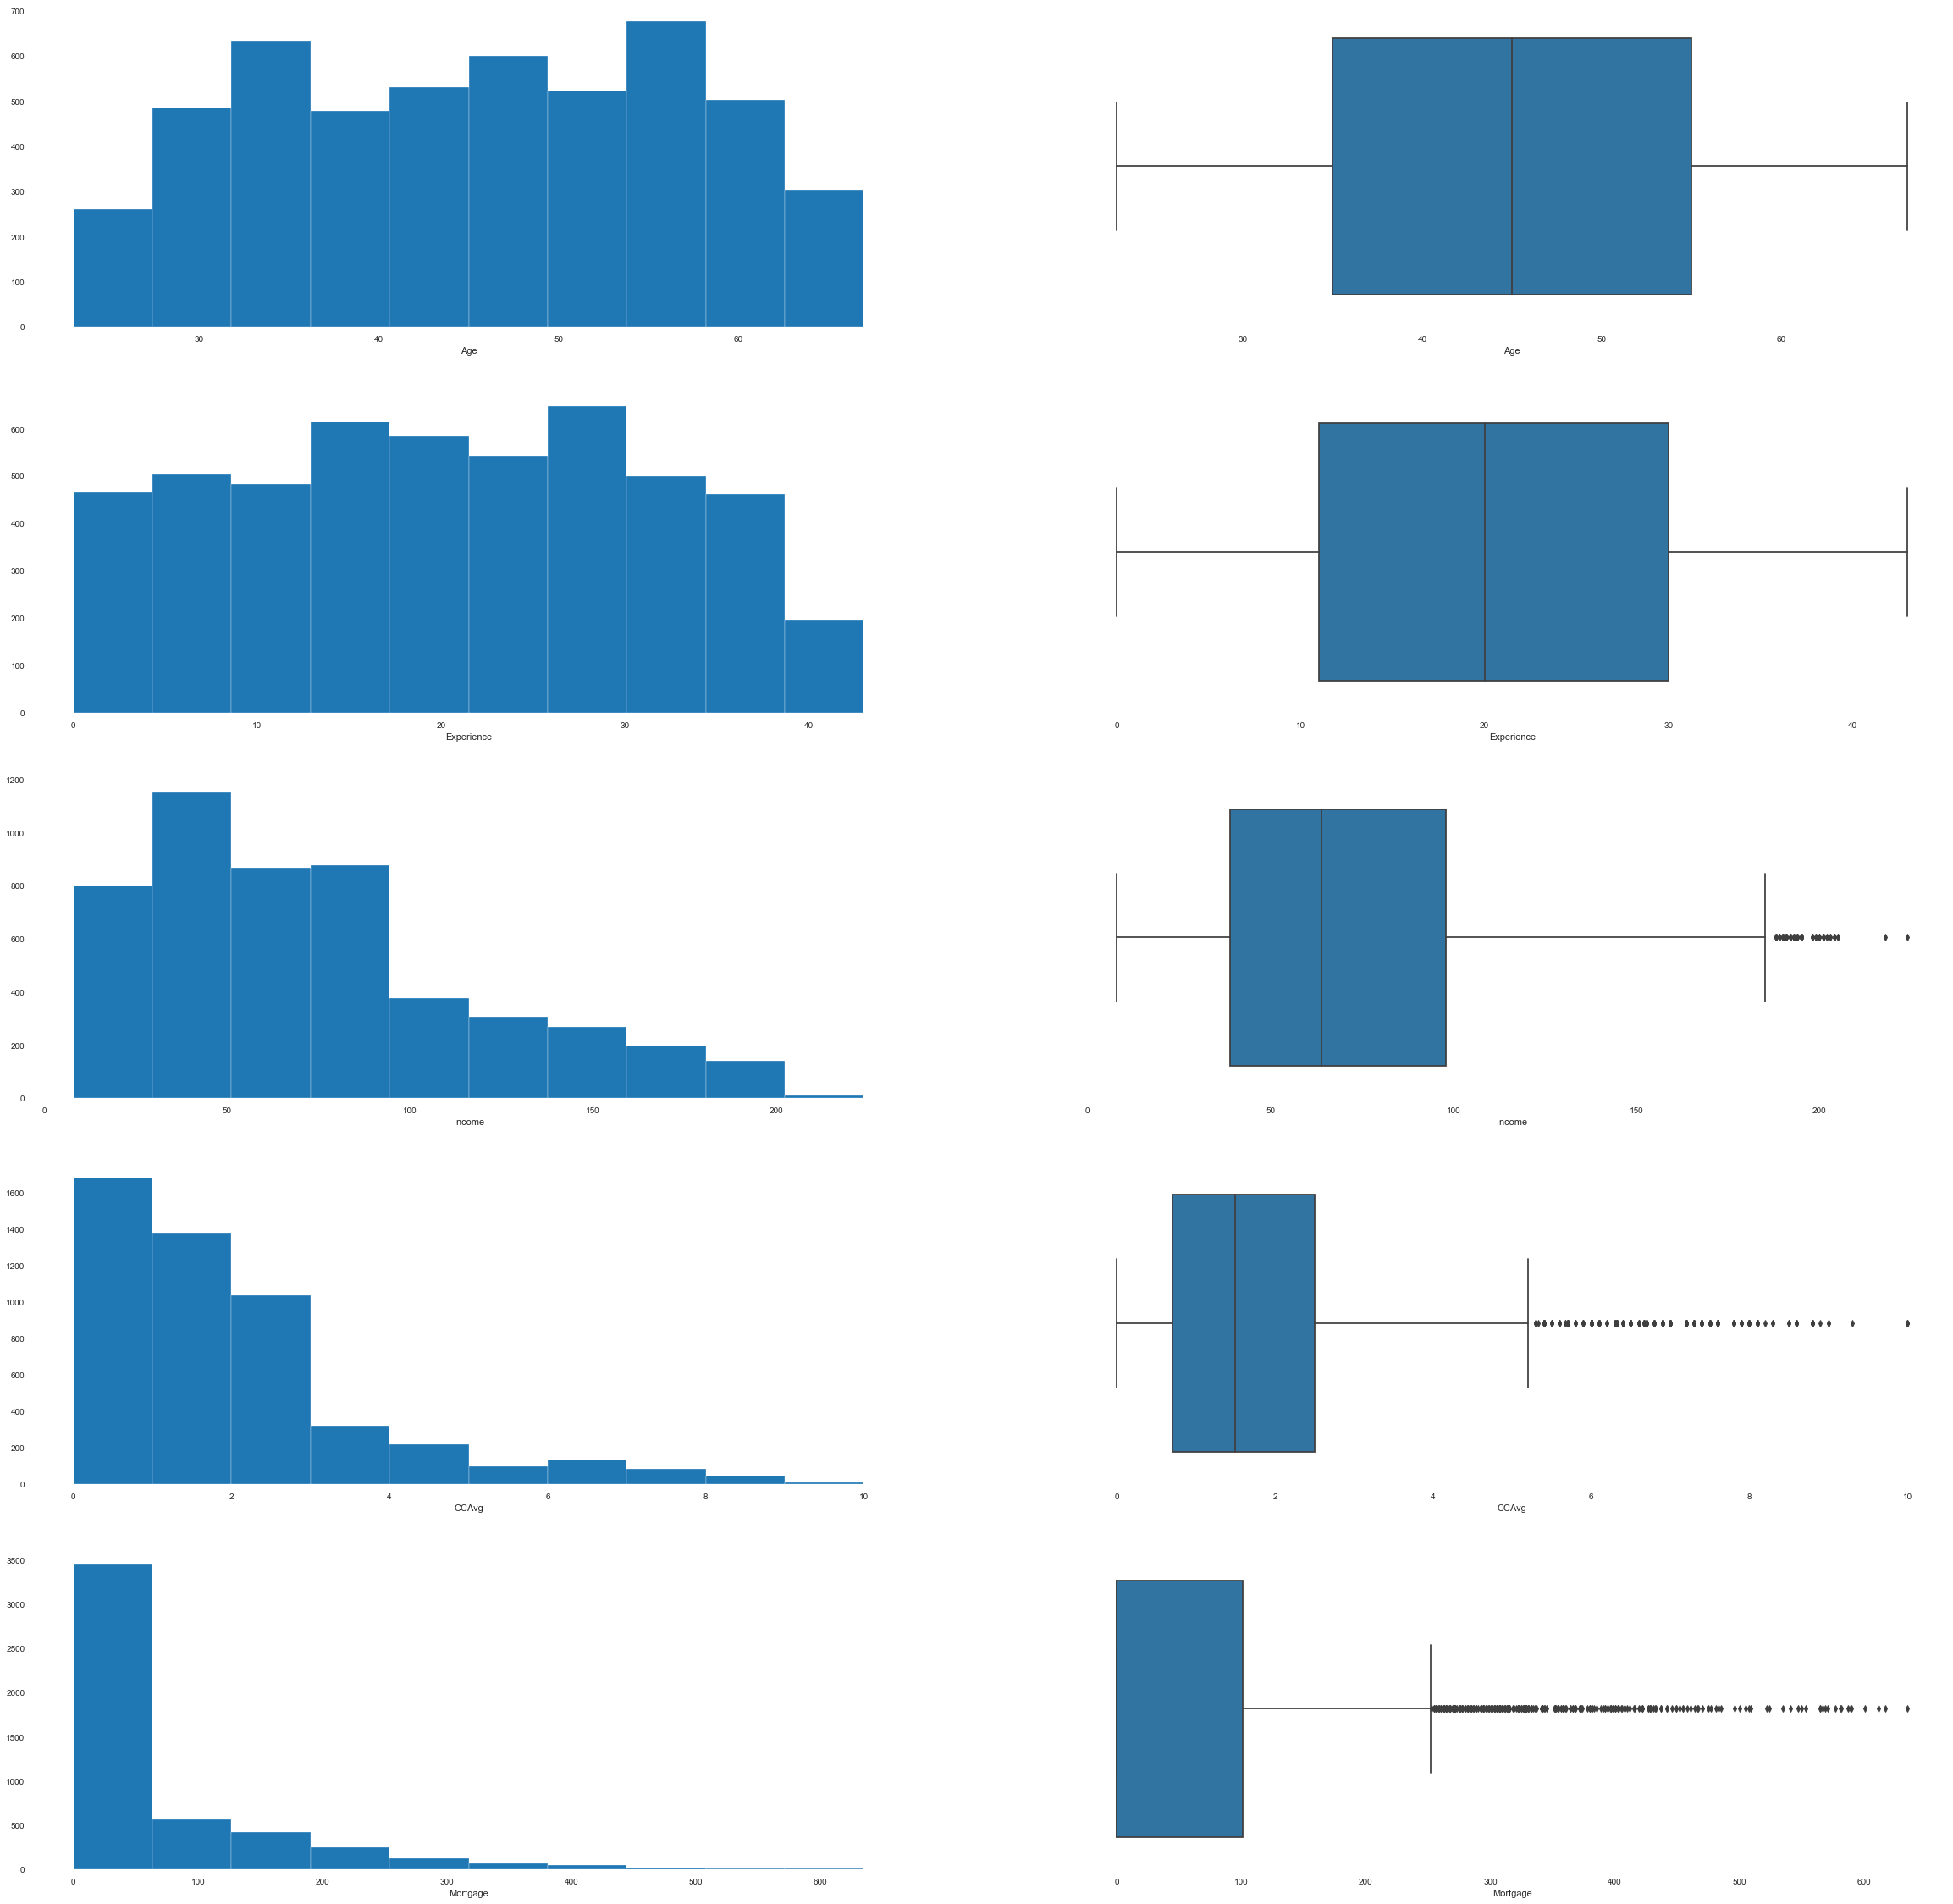

In [18]:


cont_cols=['Age','Experience','Income','CCAvg','Mortgage']

thera_df[cont_cols]
indx=1
plt.figure(figsize= (40.5,40.5))
for col in cont_cols:
    plt.subplot(5,2,indx)
    plt.hist(thera_df[col])
    plt.xlabel(col)
    indx=indx+1
    plt.subplot(5,2,indx)
    sns.boxplot(x= thera_df[col])
    indx=indx+1

  

# Observation
Age seems to be quite normally distributed with majority of 35 and 55 years of age

Experience also normally distibuted with 11 to 30 q1 and q3 

Income, CC Average and Mortgage are highly skewed

Significant outliers in mortagae and CCAvg

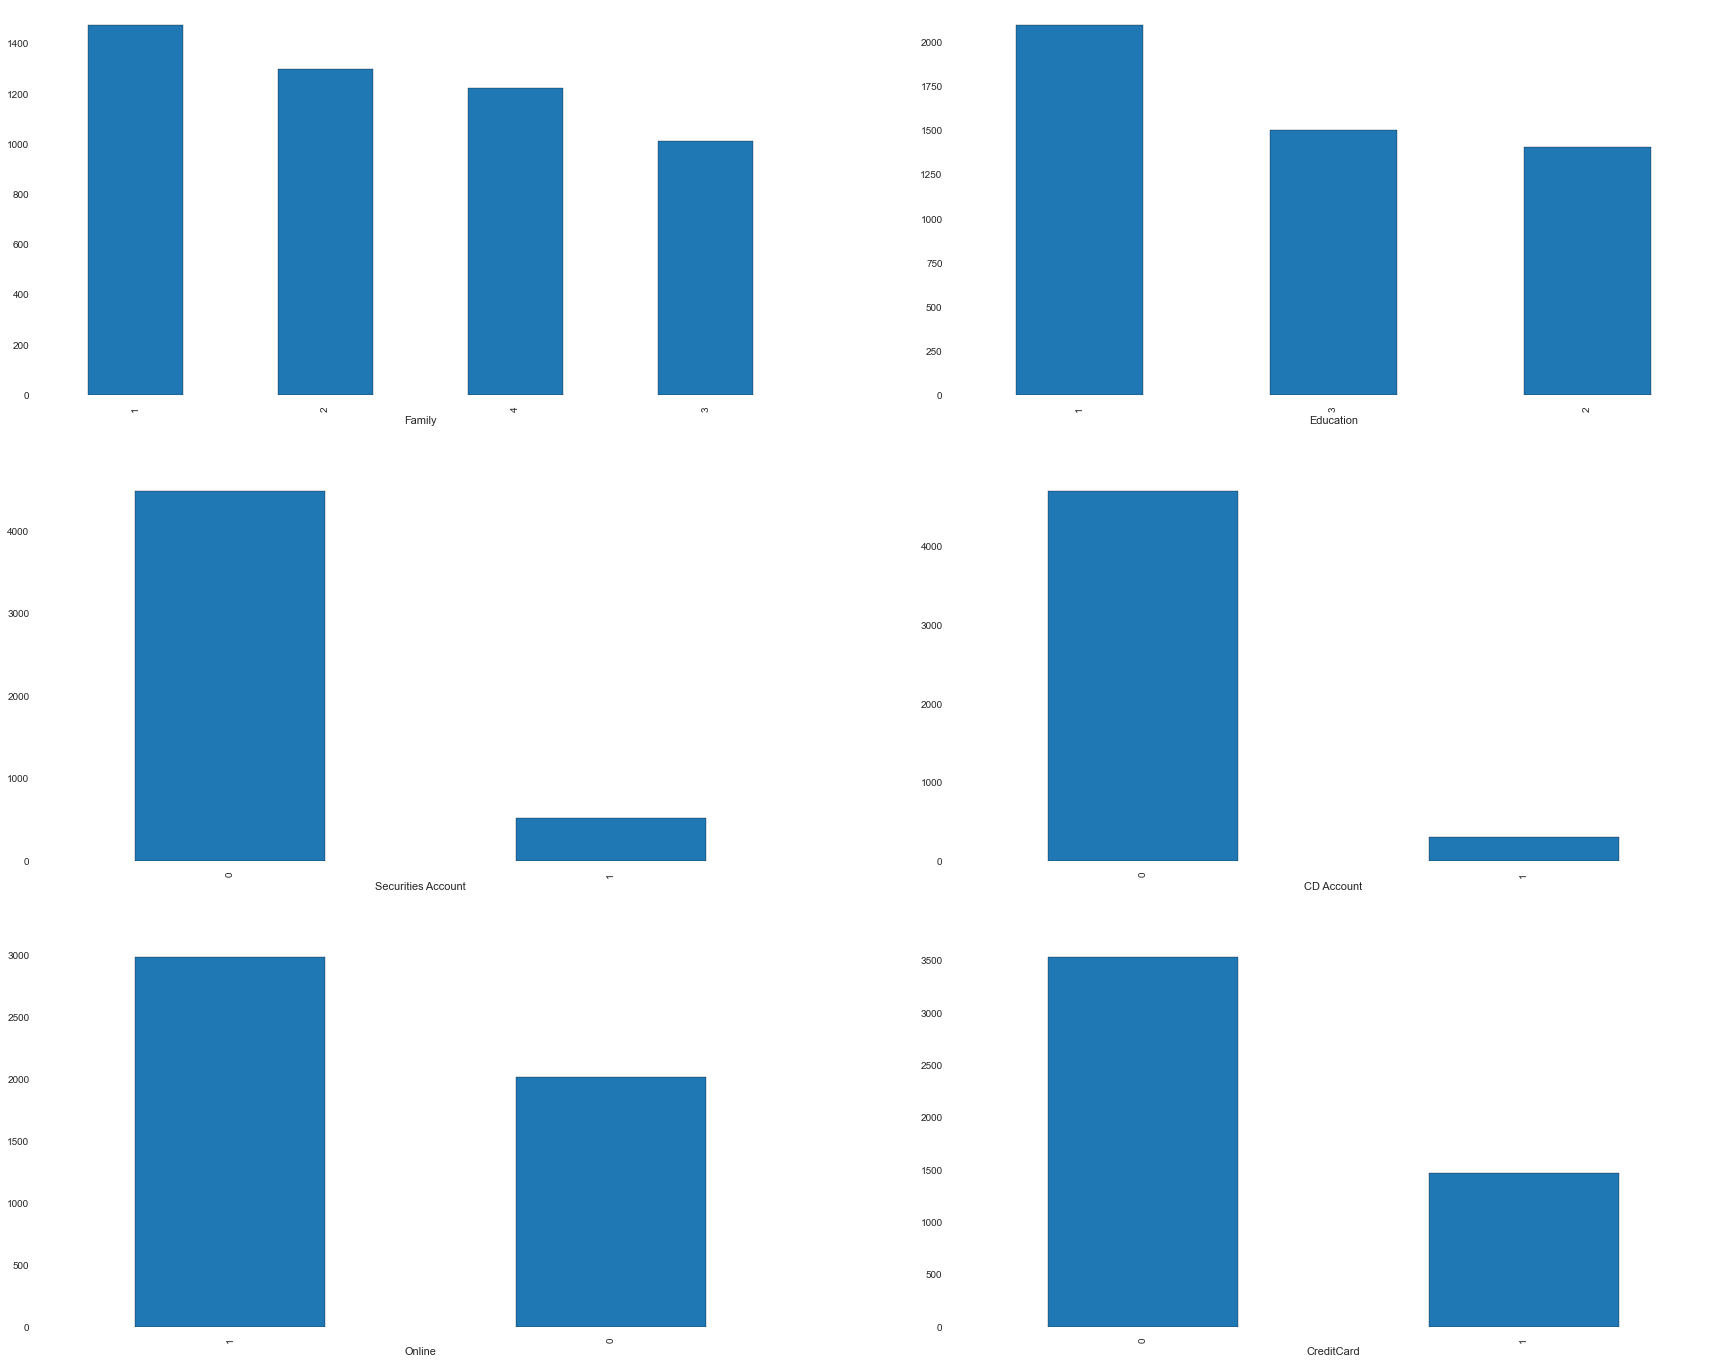

In [19]:


cat_cols=['Family', 
       'Education', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']
indx=1
plt.figure(figsize= (30,50))
for col in cat_cols:
    plt.subplot(6,2,indx)
    thera_df[col].value_counts().plot(kind="bar", align='center',edgecolor = 'black')
    plt.xlabel(col)
    indx=indx+1


## Observation:
    1. Family and education are quite evenly distributed
    2. CD , CC and Securities have vast difference
    3. Online shopping also have significant difference in population

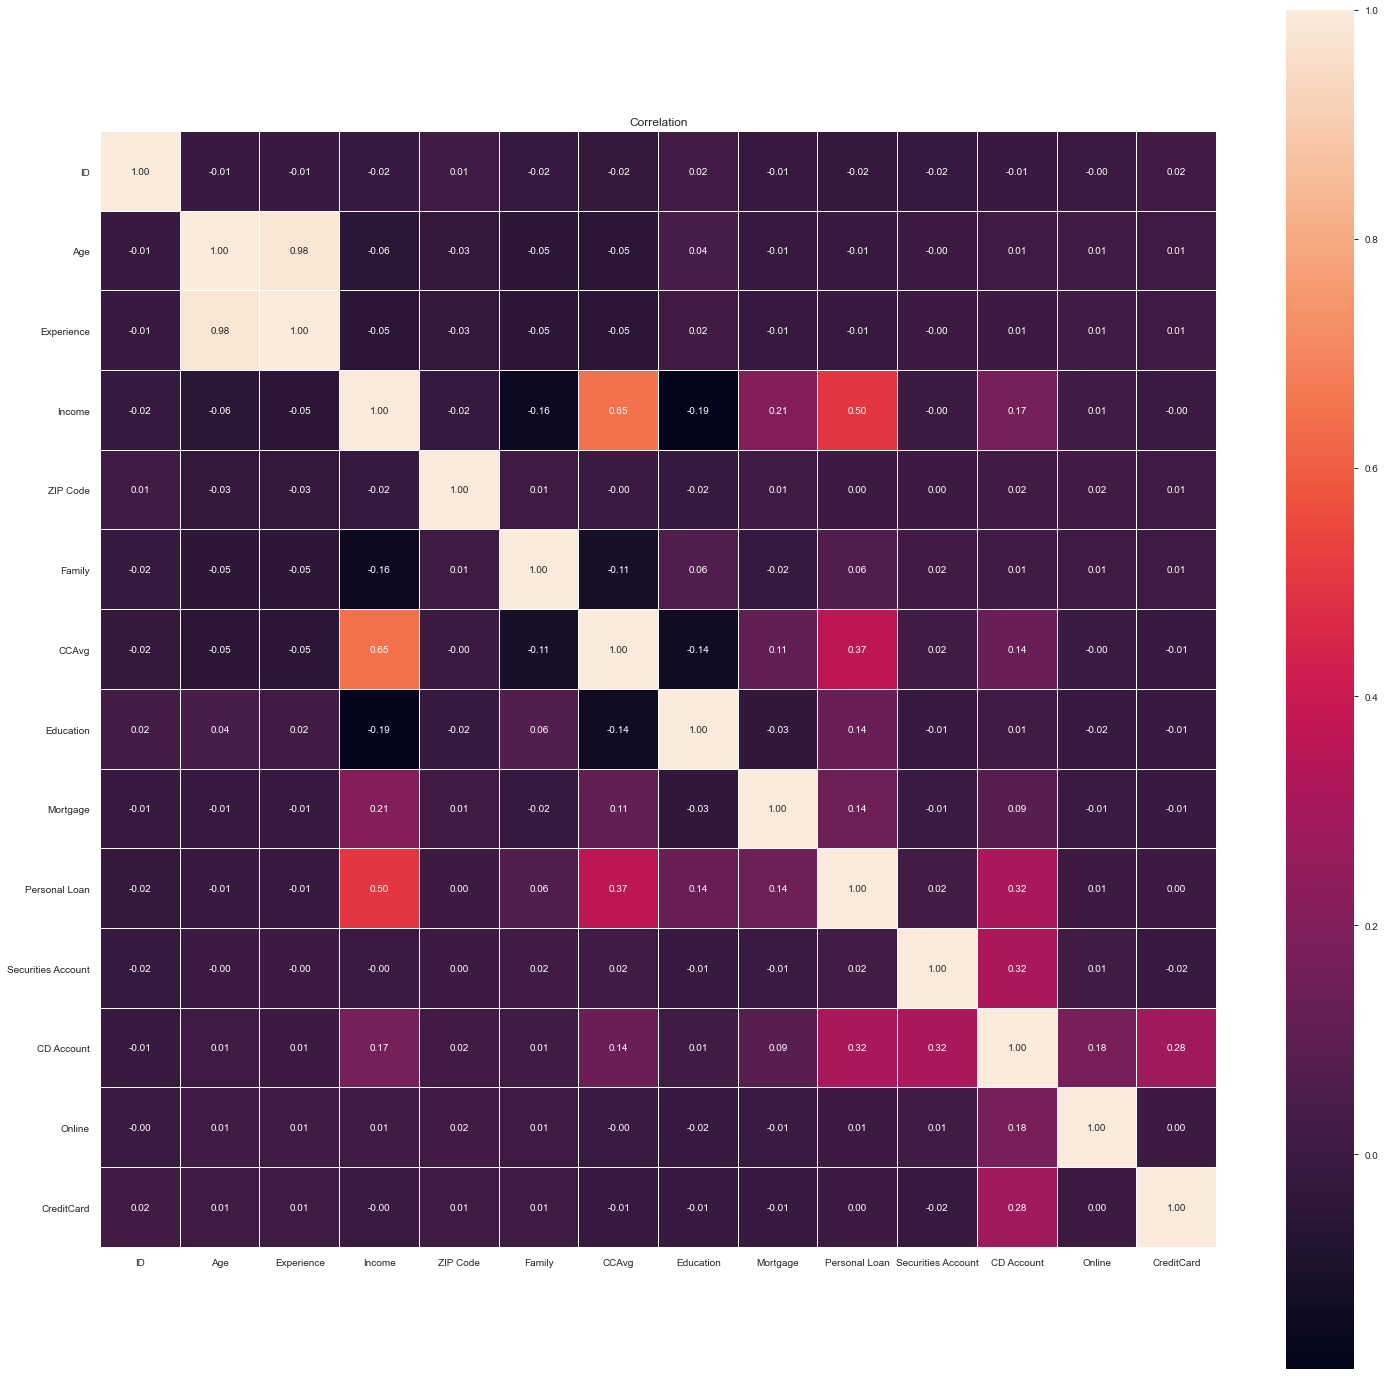

In [20]:
plt.figure(figsize=(25, 25))
ax = sns.heatmap(thera_df.corr(), fmt='.2f', annot=True, linecolor='white',linewidths=0.01,square=True)
plt.title('Correlation')
plt.show()

## Observation

The data set got 0 missing or null values

Numeric variables: ‘Age’, ‘CC_Avg’, ‘ID’, ‘Income’, ‘Mortgage’, ‘Zip_Code’, ‘Experience’
Categorical variables: ‘Education’, ‘Family’
Boolean variables: ‘CD_Account’, ‘Credit_Card’, ‘Online’, ‘Personal_Loan’, ‘Securities Account’
Column 'Experience' has negative values

Correlation:
1. Experience is highly correlated with Age (0.99)
2. Personal Loan is significantly correlated with Income,  Credit cards sepending and certificate of deposit (CD) account.
3. Income and CCAvg also corelated


We can drop ‘ID’, ‘ZIP Code’ & ‘Experience’ columns for further analysis as ‘ID’ and ‘ZIP_Code’ are just numbers of series & ‘Experience’ and ‘Age’ are highly correlated.

In [21]:
#Get data model ready
df = thera_df.copy()
thera_df.head()
df.head(2)

#Drop 'ID', 'ZIP Code' & 'Experience' and move 'Personal Loan' to last column
y= df['Personal Loan']
df.drop(['Personal Loan'], axis = 1,inplace = True)
df.drop(['Experience'], axis = 1,inplace = True)

df['PersonalLoan'] = y
df.drop(['ID'], axis = 1,inplace = True)
df.head(2)



Age  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25      49     91107       4   1.60          1         0   
1   45      34     90089       3   1.50          1         0   

   Securities Account  CD Account  Online  CreditCard  PersonalLoan  
0                   1           0       0           0             0  
1                   1           0       0           0             0

In [22]:
#Look at the data distribution
df.describe().transpose()

count      mean      std      min       25%       50%  \
Age                5,000.00     45.34    11.46    23.00     35.00     45.00   
Income             5,000.00     73.77    46.03     8.00     39.00     64.00   
ZIP Code           5,000.00 93,152.50 2,121.85 9,307.00 91,911.00 93,437.00   
Family             5,000.00      2.40     1.15     1.00      1.00      2.00   
CCAvg              5,000.00      1.94     1.75     0.00      0.70      1.50   
Education          5,000.00      1.88     0.84     1.00      1.00      2.00   
Mortgage           5,000.00     56.50   101.71     0.00      0.00      0.00   
Securities Account 5,000.00      0.10     0.31     0.00      0.00      0.00   
CD Account         5,000.00      0.06     0.24     0.00      0.00      0.00   
Online             5,000.00      0.60     0.49     0.00      0.00      1.00   
CreditCard         5,000.00      0.29     0.46     0.00      0.00      0.00   
PersonalLoan       5,000.00      0.10     0.29     0.00      0.00      0.00   

                         75%       max  
Age                    55.00     67.00  
Income                 98.00    224.00  
ZIP Code           94,608.00 96,651.00  
Family                  3.00      4.00  
CCAvg                   2.50     10.00  
Education               3.00      3.00  
Mortgage              101.00    635.00  
Securities Account      0.00      1.00  
CD Account              0.00      1.00  
Online                  1.00      1.00  
CreditCard              1.00      1.00  
PersonalLoan            0.00      1.00

### 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [23]:
array = df
X= array.iloc[:,0:11]
y= array.iloc[:,11]

In [24]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)
X.head(2)

Age  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25      49     91107       4   1.60          1         0   
1   45      34     90089       3   1.50          1         0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0

In [25]:
y.head(2)

0    0
1    0
Name: PersonalLoan, dtype: int64

In [26]:
print('df', df.shape)
print('X', X.shape)
print("y",y.shape)

df (5000, 12)
X (5000, 11)
y (5000,)


In [27]:
X.head()

Age  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25      49     91107       4   1.60          1         0   
1   45      34     90089       3   1.50          1         0   
2   39      11     94720       1   1.00          1         0   
3   35     100     94112       1   2.70          2         0   
4   35      45     91330       4   1.00          2         0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [29]:
print('X_train', X_train.shape)
print("X_test",X_test.shape)
print('y_train', y_train.shape)
print("y_test",y_test.shape)

X_train (3500, 11)
X_test (1500, 11)
y_train (3500,)
y_test (1500,)


### 4. Use Logistic Regression model to predict the number of a customers buying personal loans. Print all the metrics related for evaluating the model performance (15 marks)

In [30]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Accuracy of logistic regression classifier on train set: 0.91
Accuracy of logistic regression classifier on test set: 0.90
Trainig accuracy 0.9122857142857143

Testing accuracy 0.902

Confusion Matrix


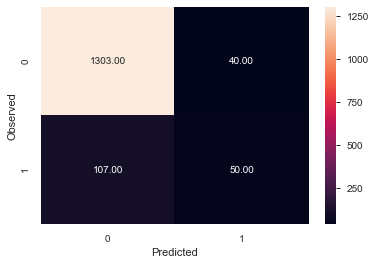

None

Recall: 0.3184713375796178

Precision: 0.5555555555555556

F1 Score: 0.40485829959514175

Roc Auc Score: 0.6443436360273368


In [31]:

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_pred))
print()
print("Recall:",recall_score(y_test,y_pred))
print()
print("Precision:",precision_score(y_test,y_pred))
print()
print("F1 Score:",f1_score(y_test,y_pred))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_pred))

In [32]:
df_confusion_matrix = confusion_matrix(y_test, y_pred)
print(df_confusion_matrix)

[[1303   40]
 [ 107   50]]


In [33]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1343
           1       0.56      0.32      0.40       157

    accuracy                           0.90      1500
   macro avg       0.74      0.64      0.68      1500
weighted avg       0.89      0.90      0.89      1500



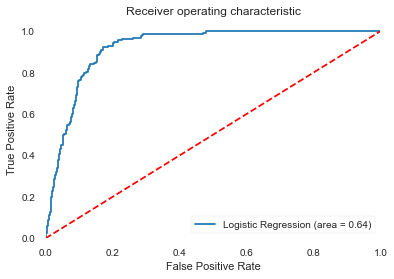

In [34]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [35]:
# Checking Parameters of logistic regression
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### 5. Give your reasoning on how can the model perform better? (10 marks)
Hint: Check parameter

Try dropping ZIP CODE AS THEY ARE SERIES DATA

 - MORE TRAINING DATA
 - OUTLIER TREATMENT
 - MISSING VLAUES
 - Try MULTIPLE ALGORITHMS
 - Try ALGORITHM TUNING




## Checking Parameters of Logistic Regression
Here recall is more important then accuracy.
As the recall is low at 32 and false negatives are high at 107, we will try to optimize the Logistic regression parameters

In [37]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
recall_score_list=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    recall_score_list.append(round(recall_score(y_test,y_predict),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)
print()
print(recall_score_list)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.951, 0.911, 0.912, 0.908, 0.908]

[0.949, 0.901, 0.902, 0.895, 0.895]

[0.611, 0.306, 0.318, 0.0, 0.0]


In [38]:
train_score=[]
test_score=[]
recall_score_list=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    recall_score_list.append(round(recall_score(y_test,y_predict),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)
print()
print(recall_score_list)

['liblinear', 'saga']

[0.951, 0.908]

[0.951, 0.895]

[0.637, 0.0]


In [ ]:
## Highest accuracy and recall of 'l1' with 'liblinear' are little better  'l2' with 'newton-cg'
# choosing liblinear with 'l1'

In [39]:
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print("Recall:",recall_score(y_test,y_predict))

Trainig accuracy 0.8877142857142857

Testing accuracy 0.8913333333333333

Recall: 0.9171974522292994


In [41]:
# Running a loop to check different values of 'C'
train_score=[]                               
test_score=[]
recall_score_list=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    recall_score_list.append(round(recall_score(y_test,y_predict),3))
print(C)
print()
print(train_score)
print()
print(test_score)
print()
print(recall_score_list)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.877, 0.89, 0.891, 0.888, 0.889, 0.888]

[0.866, 0.889, 0.893, 0.891, 0.892, 0.891]

[0.898, 0.917, 0.917, 0.917, 0.917, 0.917]


Trainig accuracy 0.8908571428571429

Testing accuracy 0.8926666666666667

Confusion Matrix


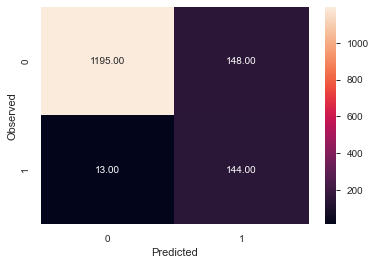

None

Recall: 0.9171974522292994

Precision: 0.4931506849315068

F1 Score: 0.6414253897550112

Roc Auc Score: 0.9034982048935031


In [42]:
#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', class_weight='balanced',C=0.25) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

## Result of logistric regression's parameters tuning

- Recall improved to 91 from 32
- Roc score to 90 from 64 %

### 6. Give Business understanding of your model? (5 marks)

 
- Type I error —  False postives
- Type II error — False negatives

In this use case, we need to reduce Type II error to include all customers who had actually bought personal loans.

In input data, the number of buyer’s percentage to the non-buyer percentage is very less. Hnece, accuracy is not a important stat.

Hence Recall is very important then precision for our usecase.

So, the right model for this usecase is to have minimize Type II error and high recall ( low false negative)

Final model has recall score of 91 %

After achieving the desired accuracy we can deploy the model for practical use. As in the bank now can predict who is interseted in personal loans. They can use the model for upcoming customers.